In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# US States Daily

## Lecture Dataframe

In [40]:
df = pd.read_csv("us_states_covid19_daily.csv")
df["date"] = pd.to_datetime(df["date"], format='%Y%m%d')

## Cas positif et nombre de test par états

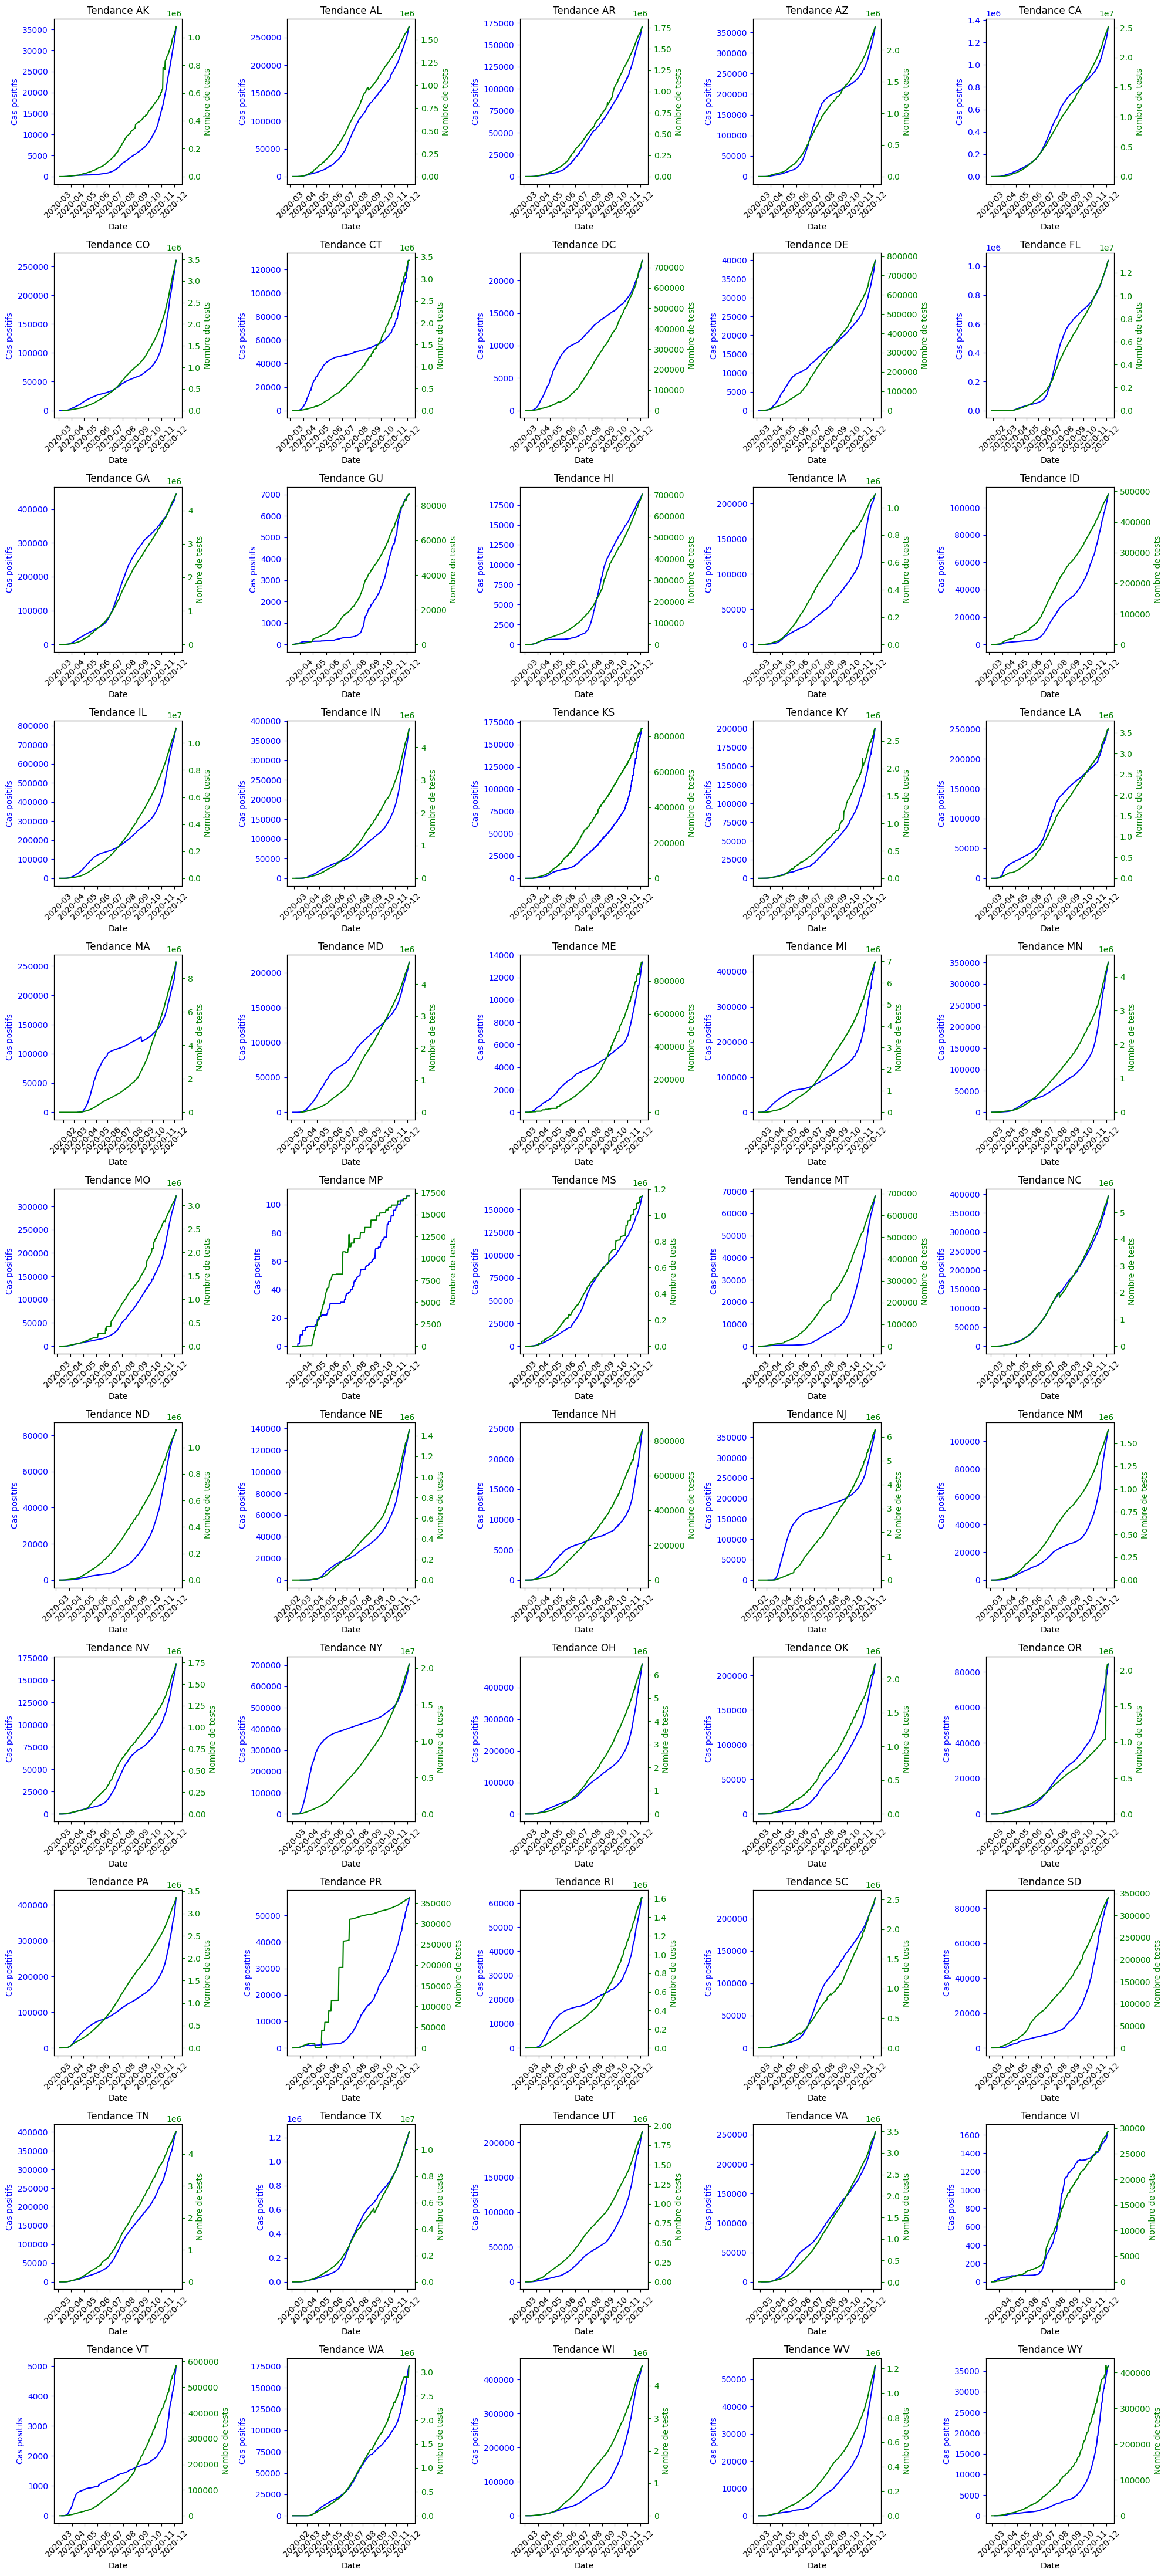

In [41]:
unique_states = df['state'].unique()

num_states = len(unique_states)
num_cols = 5
num_rows = (num_states + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*4))

for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_data = df[df['state'] == state]
    ax1 = axs[row, col]
    axs[row, col].set_title(f'Tendance {state}')
    ax1.plot(state_data['date'], state_data['positive'], label='Cas positifs', color='blue')
    ax1.set_ylabel('Cas positifs', color='blue')
    ax1.set_xlabel('Date')
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', colors='blue')
    
    ax2 = ax1.twinx()
    ax2.plot(state_data['date'], state_data['totalTestResults'], label='Nombre de tests', color='green')
    ax2.set_ylabel('Nombre de tests', color='green')
    ax2.tick_params(axis='y', colors='green')

for i in range(num_states, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

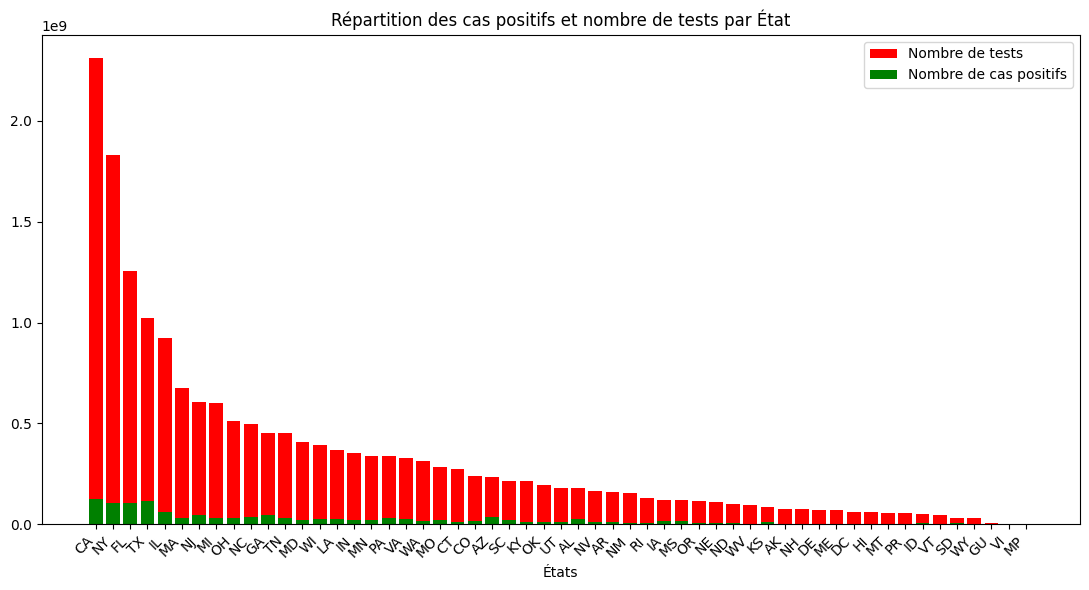

In [42]:
fig_width = max(10, num_states * 0.2)
fig_height = max(6, num_states * 0.1)

plt.figure(figsize=(fig_width, fig_height))

state_positive_cases = df.groupby('state')['positive'].sum().sort_values(ascending=False)
state_number_test = df.groupby('state')['totalTestResults'].sum().sort_values(ascending=False)

plt.bar(state_number_test.index, state_number_test.values, color="red", label="Nombre de tests")
plt.bar(state_positive_cases.index, state_positive_cases.values, color = "green", label="Nombre de cas positifs")

plt.title('Répartition des cas positifs et nombre de tests par État')
plt.xlabel('États')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


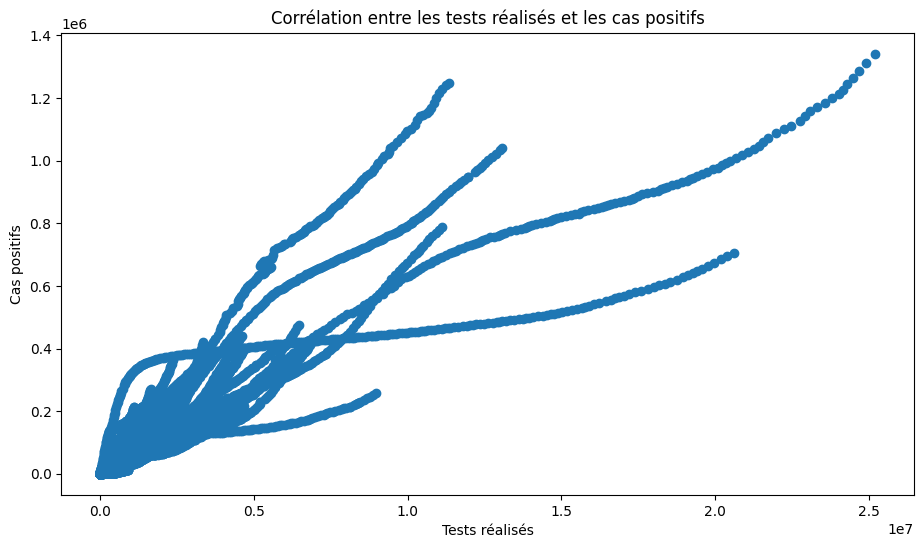

In [43]:
fig_width = max(10, num_states * 0.2)
fig_height = max(6, num_states * 0.1)

plt.figure(figsize=(fig_width, fig_height))

plt.scatter(df['totalTestResults'], df['positive'])
plt.title('Corrélation entre les tests réalisés et les cas positifs')
plt.xlabel('Tests réalisés')
plt.ylabel('Cas positifs')
plt.show()

## Morts par états

state
NY    5817666.0
NJ    3474435.0
CA    2479768.0
TX    2215251.0
FL    2151590.0
MA    1937825.0
IL    1802050.0
PA    1640049.0
MI    1578499.0
GA    1137873.0
LA    1007937.0
CT     979579.0
OH     862696.0
AZ     851473.0
MD     782196.0
IN     736476.0
NC     573710.0
VA     553724.0
SC     495925.0
MS     463052.0
AL     417014.0
MN     408866.0
WA     408482.0
TN     396658.0
CO     394757.0
MO     385015.0
WI     293398.0
NV     252428.0
IA     247511.0
RI     221767.0
KY     210659.0
AR     205692.0
OK     179032.0
NM     163873.0
DE     129765.0
KS     128749.0
DC     127968.0
PR     100879.0
OR      95458.0
NE      92484.0
NH      86402.0
UT      83092.0
ID      75983.0
ND      56870.0
WV      56543.0
SD      53655.0
MT      37162.0
ME      28475.0
HI      20272.0
VT      13746.0
WY      11986.0
AK       9519.0
GU       7241.0
VI       2920.0
MP        493.0
Name: death, dtype: float64


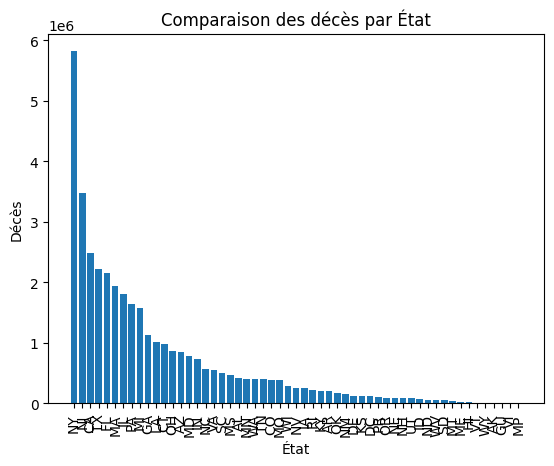

In [52]:
state_deaths = df.groupby('state')['death'].sum().sort_values(ascending=False)
print(state_deaths)
plt.bar(state_deaths.index, state_deaths.values)
plt.title('Comparaison des décès par État')
plt.xlabel('État')
plt.ylabel('Décès')
plt.xticks(rotation=90)
plt.show()

## Hospitalisation

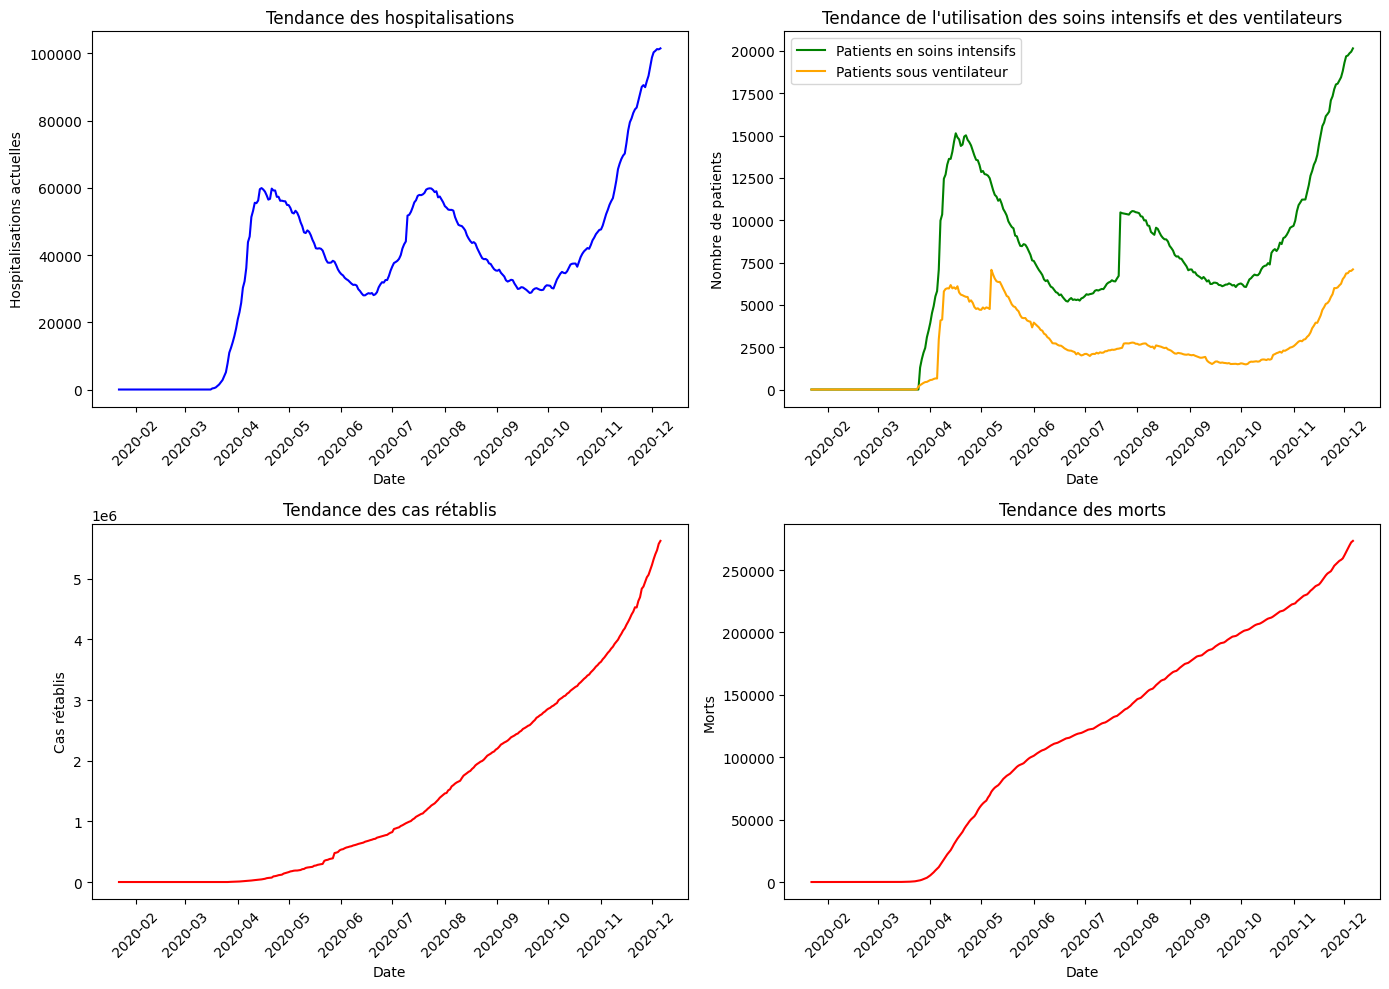

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

hospitalized_trends = df.groupby('date')['hospitalizedCurrently'].sum()
axs[0, 0].plot(hospitalized_trends.index, hospitalized_trends.values, color='blue')
axs[0, 0].set_title('Tendance des hospitalisations')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Hospitalisations actuelles')
axs[0, 0].tick_params(axis='x', labelrotation=45)

icu_trends = df.groupby('date')['inIcuCurrently'].sum()
ventilator_trends = df.groupby('date')['onVentilatorCurrently'].sum()
axs[0, 1].plot(icu_trends.index, icu_trends.values, label='Patients en soins intensifs', color='green')
axs[0, 1].plot(ventilator_trends.index, ventilator_trends.values, label='Patients sous ventilateur', color='orange')
axs[0, 1].set_title('Tendance de l\'utilisation des soins intensifs et des ventilateurs')
axs[0, 1].set_xlabel('Date')
axs[0, 1].tick_params(axis='x', labelrotation=45)
axs[0, 1].set_ylabel('Nombre de patients')
axs[0, 1].legend()

recovered_trends = df.groupby('date')['recovered'].sum()
axs[1, 0].plot(recovered_trends.index, recovered_trends.values, color='red')
axs[1, 0].set_title('Tendance des cas rétablis')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Cas rétablis')
axs[1, 0].tick_params(axis='x', labelrotation=45)

recovered_trends = df.groupby('date')['death'].sum()
axs[1, 1].plot(recovered_trends.index, recovered_trends.values, color='red')
axs[1, 1].set_title('Tendance des morts')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Morts')
axs[1, 1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

## Map of the states

In [46]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [47]:
# from wikipedia
pop_by_states = {
    "Alabama": 5024279,
    "Alaska": 733391,
    "Arizona": 7151502,
    "Arkansas": 3011524,
    "California": 39538223,
    "Colorado": 5773714,
    "Connecticut": 3605944,
    "Delaware": 989948,
    "Florida": 21538187,
    "Georgia": 10711908,
    "Hawaii": 1455271,
    "Idaho": 1839106,
    "Illinois": 12812508,
    "Indiana": 6785528,
    "Iowa": 3190369,
    "Kansas": 2937880,
    "Kentucky": 4505836,
    "Louisiana": 4657757,
    "Maine": 1362359,
    "Maryland": 6177224,
    "Massachusetts": 7029917,
    "Michigan": 10077331,
    "Minnesota": 5706494,
    "Mississippi": 2961279,
    "Missouri": 6154913,
    "Montana": 1084225,
    "Nebraska": 1961504,
    "Nevada": 3104614,
    "New Hampshire": 1377529,
    "New Jersey": 9288994,
    "New Mexico": 2117522,
    "New York": 20201249,
    "North Carolina": 10439388,
    "North Dakota": 779094,
    "Ohio": 11799448,
    "Oklahoma": 3959353,
    "Oregon": 4237256,
    "Pennsylvania": 13002700,
    "Rhode Island": 1097379,
    "South Carolina": 5118425,
    "South Dakota": 886667,
    "Tennessee": 6910840,
    "Texas": 29145505,
    "Utah": 3271616,
    "Vermont": 643077,
    "Virginia": 8631393,
    "Washington": 7705281,
    "West Virginia": 1793716,
    "Wisconsin": 5893718,
    "Wyoming": 576851,
}

In [48]:
import folium

df_deaths = df.groupby('state')['death'].sum().reset_index()
df_deaths["state"] = df_deaths["state"].map(abbrev_to_us_state)
df_deaths["population"] = df_deaths["state"].map(pop_by_states)
df_deaths["death_rate"] = df_deaths["death"] / df_deaths["population"] * 100000

m = folium.Map(location=[37, -102], zoom_start=4)

folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json',
    name='choropleth',
    data=df_deaths,
    columns=['state', 'death_rate'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Deaths by State'
).add_to(m)

m

## Conclusion

Dans l'analyse de ce dataset concernant des données COVID-19 nous avons remarqué certains points clés :

- On voit l'évolution de l'épidémie à travers le temps, une grande augmentation jusqu'au pic en décembre 2020 ou les données s'arrêtent.

- L'impact de l'hospitalisation sur le nombres de morts, en effet les pics d'hospitalisation correspondent à une baise de l'augmentation des morts

- Les états les plus touché par le virus sont ceux ayant une grande population urbaine ou très concentrée en certaine ville (New York, Californie, New Jersey).

Dans l'ensemble, cette étude de données COVID as amené une nouvelle vision du covid que je n'avais pas forcément.